In [8]:
import findspark
findspark.init("C:/Users/Workstation/AppData/Local/Programs/Python/Python39/Lib/site-packages/pyspark")

In [9]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

KeyboardInterrupt: 

In [ ]:
df = spark.read.csv("BrokenDataset.csv", inferSchema=True, header=True)
df.show()

In [23]:
for header in df.columns:
    print(header)
    print(df.where(df[header].isNull()).count())

gender
15
race/ethnicity
0
parental level of education
9
lunch
8
test preparation course
11
math score
1
reading score
6
writing score
1


In [39]:
print("Before: ", df.count())
df1 = df.dropna()
print("After: ",df1.count())

Before:  1000
After:  960


In [41]:
df2 = df.drop("lunch")
df2.show()

+------+--------------+---------------------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|                   none|        72|           72|           74|
|female|       group C|               some college|              completed|        69|           90|           88|
|female|       group B|            master's degree|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|                   none|        47|           57|           44|
|  male|       group C|               some college|                   none|        76|           78|           75|
|female|       group B|         associate's degree|                   none|     

In [81]:
for header in df.columns:
    print(header, ":", df1.select(header).schema[0].dataType)

gender : StringType
race/ethnicity : StringType
parental level of education : StringType
lunch : StringType
test preparation course : StringType
math score : IntegerType
reading score : IntegerType
writing score : IntegerType


In [89]:
dfPanda = df1.toPandas()

import matplotlib.pyplot as plt
import numpy as np

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 960 BarContainer objects>)

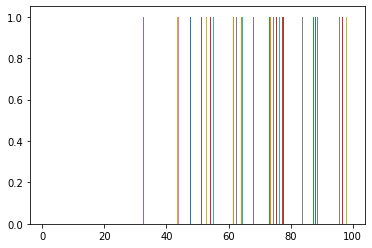

In [106]:
plt.hist(df1.select("math score").collect())